In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-22.831500248427858 -86.50668717217326
-22.502073214485634 -71.05873486899047
-8.510207257544735 24.54516190637159
57.66153297150612 98.46172604957911
44.04178782927548 -80.61417199798471
22.16816427067141 -126.86202588981949
-72.75840845803816 -75.91095168125466
-37.75292101462898 -33.448307867068905
-26.925814925494898 60.67104155423303
13.510440376621403 71.97671838899711
42.840257934365894 -105.10368092510812
-21.380162809341073 157.4979234671664
80.59419404845406 90.49626698660006
72.25482229175668 25.294541457186966
13.917161371016078 18.944539774358248
26.741160482928066 130.98458181052928
34.58119512535231 154.44144473513484
-59.3632209888425 51.095471475827935
59.862085084676835 21.13524251007567
-55.479600559794 31.968730001117365
-48.216236988955686 -7.90450449294309
34.41779002974458 -163.49161257317962
59.304618893839915 81.10668721544346
64.25213019406678 8.146661121584856
26.228789216563044 167.4007701567167
-17.546424361484227 132.2846234776735
-19.983221824955777 166.6

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
#         time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marcona
City not found. Skipping...
Processing Record 2 of Set 1 | tocopilla
Processing Record 3 of Set 1 | kamina
Processing Record 4 of Set 1 | oktyabrskiy
Processing Record 5 of Set 1 | mount forest
Processing Record 6 of Set 1 | san quintin
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | souillac
Processing Record 10 of Set 1 | karwar
Processing Record 11 of Set 1 | douglas
Processing Record 12 of Set 1 | hervey bay
Processing Record 13 of Set 1 | talnakh
Processing Record 14 of Set 1 | havoysund
Processing Record 15 of Set 1 | ati
Processing Record 16 of Set 1 | naze
Processing Record 17 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 18 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 19 of Set 1 | uusikaupunki
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 

Processing Record 38 of Set 4 | toulepleu
City not found. Skipping...
Processing Record 39 of Set 4 | kavieng
Processing Record 40 of Set 4 | bluefields
Processing Record 41 of Set 4 | luena
Processing Record 42 of Set 4 | honningsvag
Processing Record 43 of Set 4 | diamantino
Processing Record 44 of Set 4 | a
City not found. Skipping...
Processing Record 45 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 46 of Set 4 | cidreira
Processing Record 47 of Set 4 | bor
Processing Record 48 of Set 4 | ducheng
Processing Record 49 of Set 4 | shizukuishi
Processing Record 50 of Set 4 | nguiu
City not found. Skipping...
Processing Record 1 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 5 | ilula
Processing Record 3 of Set 5 | la romana
Processing Record 4 of Set 5 | fairbanks
Processing Record 5 of Set 5 | lhokseumawe
Processing Record 6 of Set 5 | saint-joseph
Processing Record 7 of Set 5 | corrente
Processing Record 8 of Set 5 | cherskiy
Proc

Processing Record 29 of Set 8 | sisimiut
Processing Record 30 of Set 8 | alofi
Processing Record 31 of Set 8 | nome
Processing Record 32 of Set 8 | iralaya
Processing Record 33 of Set 8 | alotau
City not found. Skipping...
Processing Record 34 of Set 8 | poum
Processing Record 35 of Set 8 | parrita
Processing Record 36 of Set 8 | touros
Processing Record 37 of Set 8 | benoy
Processing Record 38 of Set 8 | north bend
Processing Record 39 of Set 8 | praia da vitoria
Processing Record 40 of Set 8 | rio branco
Processing Record 41 of Set 8 | nova russas
Processing Record 42 of Set 8 | russell
Processing Record 43 of Set 8 | bani
Processing Record 44 of Set 8 | verkhnevilyuysk
Processing Record 45 of Set 8 | guiren
Processing Record 46 of Set 8 | vestmannaeyjar
Processing Record 47 of Set 8 | amlame
Processing Record 48 of Set 8 | montevideo
Processing Record 49 of Set 8 | marsa matruh
Processing Record 50 of Set 8 | lexington
Processing Record 1 of Set 9 | nekhayevskiy
Processing Record 2 

Processing Record 19 of Set 12 | nuuk
Processing Record 20 of Set 12 | turukhansk
Processing Record 21 of Set 12 | naberera
Processing Record 22 of Set 12 | mahibadhoo
Processing Record 23 of Set 12 | partizanskoye
Processing Record 24 of Set 12 | tidore
City not found. Skipping...
Processing Record 25 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 26 of Set 12 | sorvag
City not found. Skipping...
Processing Record 27 of Set 12 | varjota
Processing Record 28 of Set 12 | ust-tsilma
Processing Record 29 of Set 12 | sompeta
Processing Record 30 of Set 12 | eydhafushi
Processing Record 31 of Set 12 | kandi
Processing Record 32 of Set 12 | zyryanskoye
Processing Record 33 of Set 12 | labuhan
Processing Record 34 of Set 12 | juifang
City not found. Skipping...
Processing Record 35 of Set 12 | lehi
Processing Record 36 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 37 of Set 12 | tlanalapan
Processing Record 38 of Set 12 | fort nelson
Processing Record

In [10]:
len(city_data)

568

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tocopilla,-22.0920,-70.1979,66.43,63,21,5.73,CL,2022-09-14 18:51:11
1,Kamina,-8.7386,24.9906,72.95,32,54,2.21,CD,2022-09-14 18:51:11
2,Oktyabrskiy,54.4815,53.4710,57.18,42,100,11.12,RU,2022-09-14 18:50:43
3,Mount Forest,43.9795,-80.7221,72.39,52,3,10.36,CA,2022-09-14 18:51:12
4,San Quintin,30.4833,-115.9500,71.11,82,100,10.63,MX,2022-09-14 18:51:12
5,Ushuaia,-54.8000,-68.3000,46.06,36,20,10.36,AR,2022-09-14 18:42:29
6,Arraial Do Cabo,-22.9661,-42.0278,71.56,88,75,13.80,BR,2022-09-14 18:45:41
7,Souillac,-20.5167,57.5167,71.98,68,40,8.05,MU,2022-09-14 18:46:23
8,Karwar,14.8000,74.1333,77.16,89,62,11.34,IN,2022-09-14 18:51:13
9,Douglas,41.3000,-96.1670,89.53,47,0,12.66,US,2022-09-14 18:46:58


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tocopilla,CL,2022-09-14 18:51:11,-22.0920,-70.1979,66.43,63,21,5.73
1,Kamina,CD,2022-09-14 18:51:11,-8.7386,24.9906,72.95,32,54,2.21
2,Oktyabrskiy,RU,2022-09-14 18:50:43,54.4815,53.4710,57.18,42,100,11.12
3,Mount Forest,CA,2022-09-14 18:51:12,43.9795,-80.7221,72.39,52,3,10.36
4,San Quintin,MX,2022-09-14 18:51:12,30.4833,-115.9500,71.11,82,100,10.63
...,...,...,...,...,...,...,...,...,...
563,Lososina,RU,2022-09-14 18:53:47,48.9975,140.3106,53.04,68,10,6.11
564,Byron Bay,AU,2022-09-14 18:50:14,-28.6500,153.6167,55.94,84,100,2.08
565,Shelburne,CA,2022-09-14 18:47:00,44.0787,-80.2041,66.99,66,49,13.29
566,Piqua,US,2022-09-14 18:53:48,40.1448,-84.2424,79.38,54,48,5.44


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

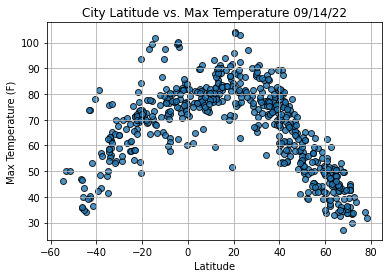

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

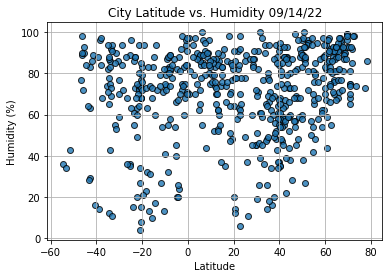

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

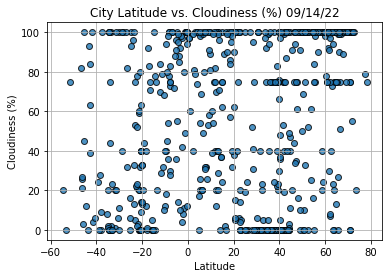

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

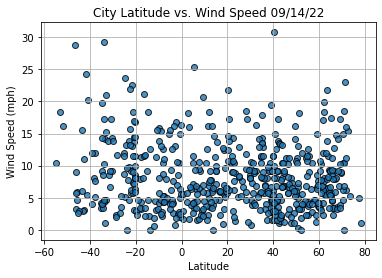

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                          Ati
Country                        TD
Date          2022-09-14 18:51:13
Lat                       13.2154
Lng                       18.3353
Max Temp                    85.42
Humidity                       62
Cloudiness                    100
Wind Speed                   6.22
Name: 13, dtype: object

In [28]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
563     True
564    False
565     True
566     True
567     True
Name: Lat, Length: 568, dtype: bool

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Oktyabrskiy,RU,2022-09-14 18:50:43,54.4815,53.4710,57.18,42,100,11.12
3,Mount Forest,CA,2022-09-14 18:51:12,43.9795,-80.7221,72.39,52,3,10.36
4,San Quintin,MX,2022-09-14 18:51:12,30.4833,-115.9500,71.11,82,100,10.63
8,Karwar,IN,2022-09-14 18:51:13,14.8000,74.1333,77.16,89,62,11.34
9,Douglas,US,2022-09-14 18:46:58,41.3000,-96.1670,89.53,47,0,12.66
...,...,...,...,...,...,...,...,...,...
562,Lukiv,UA,2022-09-14 18:53:47,51.0521,25.4006,62.19,88,100,7.23
563,Lososina,RU,2022-09-14 18:53:47,48.9975,140.3106,53.04,68,10,6.11
565,Shelburne,CA,2022-09-14 18:47:00,44.0787,-80.2041,66.99,66,49,13.29
566,Piqua,US,2022-09-14 18:53:48,40.1448,-84.2424,79.38,54,48,5.44


In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Oktyabrskiy,RU,2022-09-14 18:50:43,54.4815,53.4710,57.18,42,100,11.12
3,Mount Forest,CA,2022-09-14 18:51:12,43.9795,-80.7221,72.39,52,3,10.36
4,San Quintin,MX,2022-09-14 18:51:12,30.4833,-115.9500,71.11,82,100,10.63
8,Karwar,IN,2022-09-14 18:51:13,14.8000,74.1333,77.16,89,62,11.34
9,Douglas,US,2022-09-14 18:46:58,41.3000,-96.1670,89.53,47,0,12.66


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

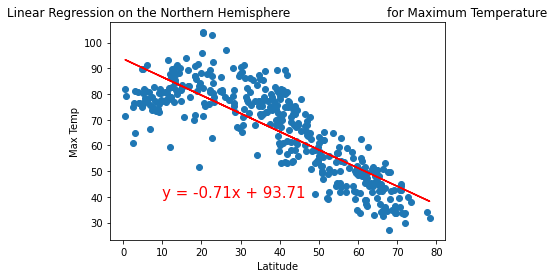

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

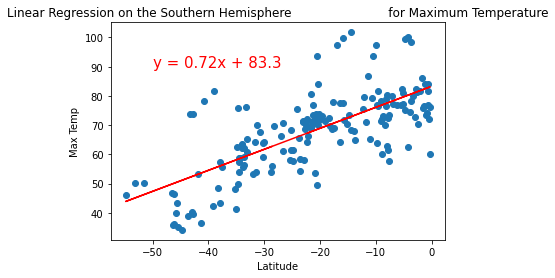

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

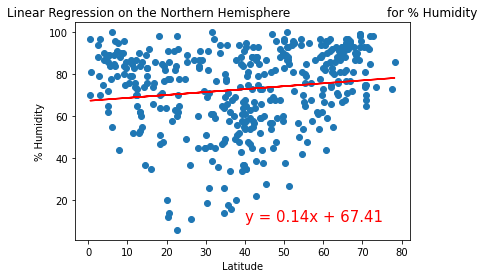

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

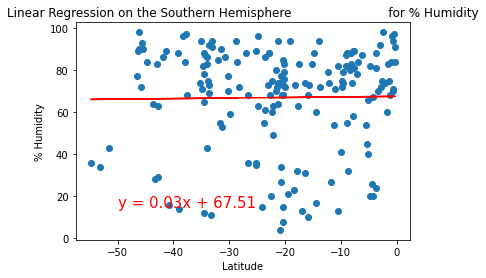

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

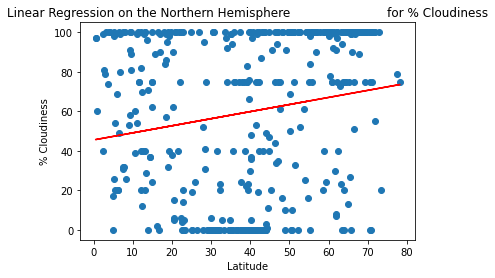

In [46]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

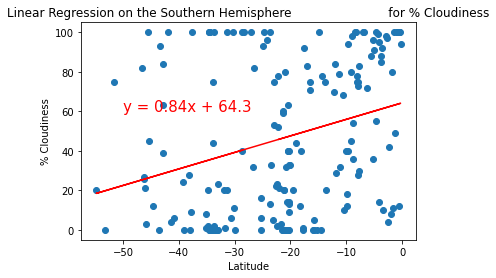

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

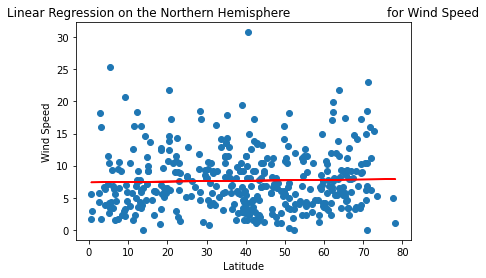

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

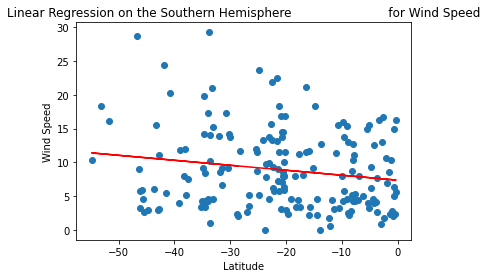

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))